## Elipsoide_Clark_FAT_Teste_Declinacao

## Coisas para importar

In [1]:
import numpy as np
from scipy import linalg
from matplotlib import pyplot as plt

from fatiando import mesher, gridder, utils

import scipy.special
import scipy.interpolate

%matplotlib inline

## Importar minhas funções de um arquivo externo

In [2]:
import Elipsoide_Clark_FAT_Unificado as me5

#### Fatiando a Terra - Ellipsoid

In [72]:
# Malha coordenadas geograficas
xmin = -1000.
xmax = 1000.
ymin = -900.
ymax = 900.
Nx = 200
Ny = 200

#xc posicao x , yc posição y e zc profundidade reais
xc = 0
yc = 0
zc = 500.

# Orientacoes do elipsoide
azimuth = 05.
delta = 40.
gamma = 0.

# Eixos do elipsoide
a = np.linspace(50.00001, 3000., 25)
b = 10.00000
c = 9.99999

# Create a regular grid at 0m height
shape = (Nx, Ny)
area = [xmin, xmax, ymin, ymax]
Xp, Yp, Zp = gridder.regular(area, shape, z=0.)

# Set the inclination and declination of the regional field
inten, inc, dec  = 60000., 0., 90.    #nT, graus, graus

################################################################################################################################
################################################################################################################################
model1 = []
# Create a ellipsoid model (Triaxial)
for i in range (len(a)):
    model1.append(me5.Ellipsoid(Xp, Yp, Zp, xc, yc, zc, a[i], b, c, azimuth, delta, gamma, 
                              {'remanence': np.array([0., 0., 25.84]),
                               'k1': np.array([100000.5001, 90., 0.]),
                               'k2': np.array([100000.5001, 180., 0.]),
                               'k3': np.array([100000.5001, 0., 90.])}
                              ))

In [73]:
# Calculate the anomaly for a given regional field (Triaxial)
JRD_cart = me5.jrd_cartesiano (inten,inc,dec,model1)
Bx = me5.bx_c (Xp,Yp,Zp,inten,inc,dec,model1)
By = me5.by_c (Xp,Yp,Zp,inten,inc,dec,model1)
Bz = me5.bz_c (Xp,Yp,Zp,inten,inc,dec,model1)
Tf = me5.tf_c (Xp,Yp,Zp,inten,inc,dec,model1)

Bx = np.reshape(Bx, shape)
By = np.reshape(By, shape)
Bz = np.reshape(Bz, shape)
Tf = np.reshape(Tf, shape)

vetor_dec = np.zeros_like(a)
for i in range (len(a)):
    vetor_dec[i] = JRD_cart[i][2]
    
eixo = a/(b+c)

In [74]:
v1 = model1[0].mcon[0,:]

In [75]:
v1_int, v1_inc, v1_dec = utils.vec2ang(v1)

In [76]:
v1_int, v1_inc, v1_dec

(0.99999999999999989, -40.000000000000007, 4.9999999999999876)

In [77]:
JRD_cart

[[11595.072420229691, -16.209217833937203, 69.81050605736975],
 [38491.606946624415, -37.711992561852128, 23.366908794128332],
 [90890.447328043316, -39.397439401129219, 12.811848225328694],
 [163139.80103461805, -39.72989040774214, 9.3569529929486848],
 [253684.34205037801, -39.845189668357648, 7.803026059176104],
 [361640.57239221974, -39.898524409259039, 6.9666633655562178],
 [486379.06855926791, -39.927738597722765, 6.462450174391754],
 [627406.82621419418, -39.945592244196497, 6.1338018283459919],
 [784316.47991209978, -39.957365916095185, 5.9070169940674075],
 [956759.25794312858, -39.965575216944814, 5.7435641669267845],
 [1144428.7349413277, -39.971547762171241, 5.6216456622008133],
 [1347050.2811972452, -39.976040790606483, 5.5281482337322325],
 [1564373.8250872951, -39.979513307762559, 5.4547841231485208],
 [1796168.6803481223, -39.982257488441057, 5.3960988977630926],
 [2042219.7288617368, -39.984466931183412, 5.3483792328759883],
 [2302324.5303048557, -39.986274291182646, 5

## Resultado da minha função

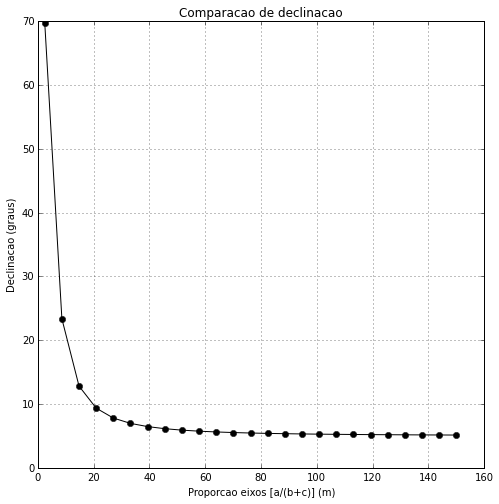

In [78]:
plt.figure(figsize=(8,8))

plt.plot(eixo, vetor_dec, '-ko')
plt.xlabel('Proporcao eixos [a/(b+c)] (m)')
plt.ylabel('Declinacao (graus)')
plt.title('Comparacao de declinacao')
plt.grid(True)
plt.legend()
plt.show()